# Import Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df = pd.read_csv('heart.csv')

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


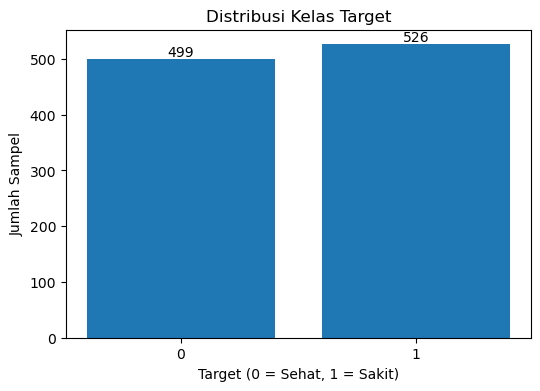

In [29]:
# 2. Plot distribusi dengan bar chart
counts = df['target'].value_counts().sort_index()
labels = counts.index.astype(str)

plt.figure(figsize=(6,4))
plt.bar(labels, counts.values)
plt.title('Distribusi Kelas Target')
plt.xlabel('Target (0 = Sehat, 1 = Sakit)')
plt.ylabel('Jumlah Sampel')
for i, v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha='center')
plt.show()

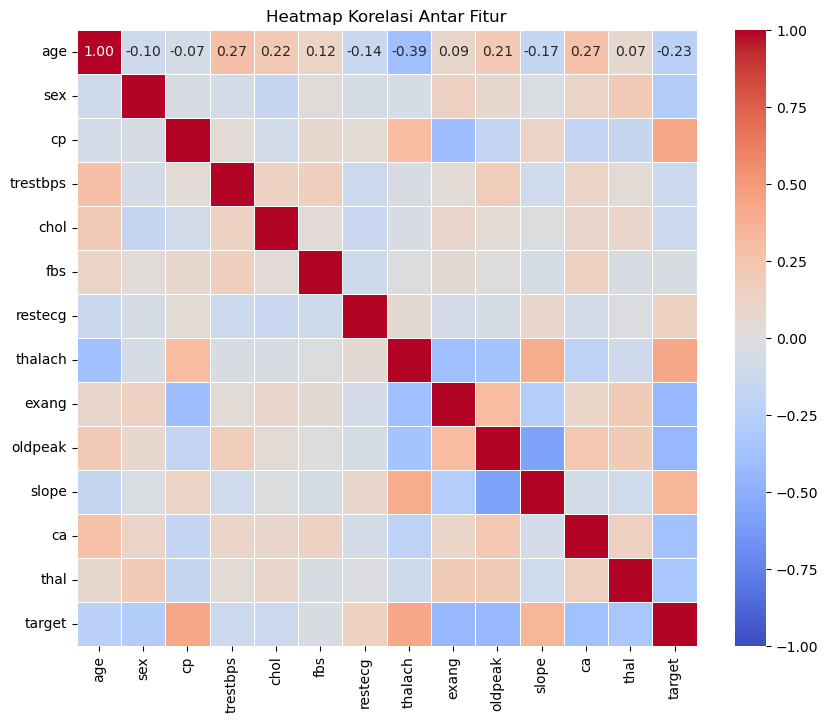

In [31]:
correlation_matrix = df.corr()

# 2. Plot heatmap korelasi
plt.figure(figsize=(10, 8))  # Ukuran gambar
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Data Scaling

In [7]:
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['trestbps'] = le.fit_transform(df['trestbps'])
df['age'] = le.fit_transform(df['age'])
df['chol'] = le.fit_transform(df['chol'])
df['age'] = le.fit_transform(df['age'])
df['thalach'] = le.fit_transform(df['thalach'])
df['thalach'] = le.fit_transform(df['thalach'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,18,1,0,18,43,0,1,67,0,1.0,2,2,3,0
1,19,1,0,28,34,1,0,54,1,3.1,0,0,3,0
2,36,1,0,31,12,0,1,25,1,2.6,0,0,3,0
3,27,1,0,33,34,0,1,60,0,0.0,2,1,3,0
4,28,0,0,27,116,1,1,9,0,1.9,1,3,2,0


# Split Data

In [8]:
X = df.drop(['target'], axis=1)
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model dan Evaluasi

## LightGBM

In [19]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',  # Karena ini adalah masalah klasifikasi biner
    'metric': 'binary_error',  # Kita menggunakan error sebagai metric
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree (GBDT)
    'num_leaves': 31,  # Jumlah leaves dalam tree
    'learning_rate': 0.1,  # Learning rate
    'feature_fraction': 0.9,  # Persentase fitur yang dipilih untuk tiap iterasi
}

bst = lgb.train(params,
                train_data,
                valid_sets=[test_data],  # Data validasi
                num_boost_round=100,  # Jumlah iterasi
                callbacks=[lgb.early_stopping(stopping_rounds=50)]) # Jika tidak ada peningkatan dalam 50 iterasi, pelatihan dihentikan

[LightGBM] [Info] Number of positive: 421, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513415 -> initscore=0.053671
[LightGBM] [Info] Start training from score 0.053671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping,

## Decision tree

In [20]:
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Training model dengan data training
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluasi

In [22]:
y_pred_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary_lgb = (y_pred_lgb >= 0.5).astype(int)
accuracy_tuned = accuracy_score(y_test, y_pred_binary_lgb)
print(f'🟢 Akurasi Lightgbm: {accuracy_tuned:.4f}')
print('🟢 Classification Report Lightgbm:')
print(classification_report(y_test, y_pred_binary_lgb))


y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Untuk ROC
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'🟢 Akurasi Decision Tree: {accuracy_dt:.4f}')
print('🟢 Classification Report Decision Tree:')
print(classification_report(y_test, y_pred_dt))

🟢 Akurasi Lightgbm: 1.0000
🟢 Classification Report Lightgbm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

🟢 Akurasi Decision Tree: 0.9854
🟢 Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



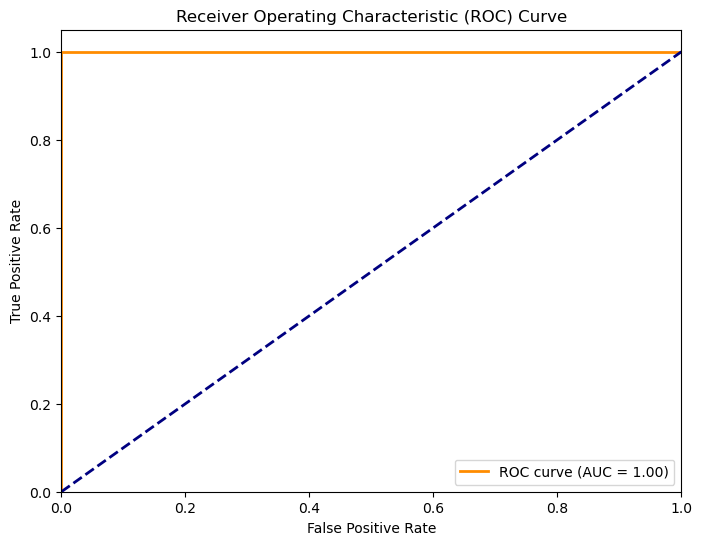

In [27]:
# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb)

# Menghitung AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

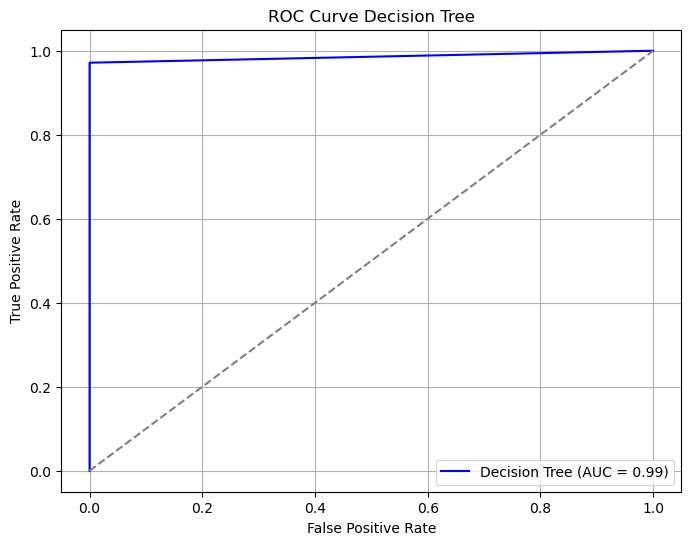

In [28]:
# Hitung ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend()
plt.grid()
plt.show()